In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


##check missing values, features with nan value

In [9]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [10]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [11]:
df['NumberOfFollowups'].unique()

array([ 3.,  4.,  2.,  5., nan,  1.,  6.])

In [12]:
df['NumberOfChildrenVisiting'].unique()

array([ 0.,  2.,  1., nan,  3.])

In [13]:
df['NumberOfTrips'].unique()

array([ 1.,  2.,  7.,  5.,  6.,  3.,  4., 19., 21.,  8., nan, 20., 22.])

## Imputing Null Values

In [14]:
#age
df.Age.fillna(df.Age.median(), inplace=True)
#TypeofContract
df.DurationOfPitch.fillna(df.DurationOfPitch.mode()[0], inplace=True)
#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
#NumberOfTrips
df.NumberOfTrips.fillna(0,inplace=True)
#NumberOfChildreanVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)
#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [15]:
df.drop('CustomerID', axis=1, inplace=True)

In [16]:
df.isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [17]:
#combine numberofpersonvisitng and numberofchildrenvisitng 
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns = ['NumberOfPersonVisiting','NumberOfChildrenVisiting'], inplace=True)

In [18]:
#get all the numerica features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(num_features))

Number of numerical features:  12


In [19]:
#categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features: ', len(cat_features))

Number of categorical features:  6


In [20]:
#discrete features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Number of discrete features: ', len(discrete_features))

Number of discrete features:  9


In [21]:
#continous features
continous_features = [feature for feature in num_features if feature not in discrete_features]
print('Number of continous features: ', len(continous_features))

Number of continous features:  3


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [23]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [24]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [25]:
#separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [26]:
#column transformer
cat_features =  X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(exclude=['object']).columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScaler', numeric_transformer, num_features),
        ('OneHotEncoder', oh_transformer, cat_features)
    ])

In [27]:
print(preprocessor)

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')),
                                ('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object'))])


In [28]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Random Forest Classifier Training

## Adaboost Classifier Training 

## XGBoost Classifier Training

In [30]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 3.0 MB/s eta 0:00:24
    --------------------------------------- 1.6/72.0 MB 3.2 MB/s eta 0:00:22
    --------------------------------------- 1.6/72.0 MB 3.2 MB/s eta 0:00:22
   - -------------------------------------- 2.6/72.0 MB 2.7 MB/s eta 0:00:26
   -- ------------------------------------- 3.7/72.0 MB 3.2 MB/s eta 0:00:22
   -- ------------------------------------- 4.2/72.0 MB 3.1 MB/s eta 0:00:23
   -- ------------------------------------- 5.2/72.0 MB 3.4 MB/s eta 0:00:20
   --- ------------------------------------ 6.3/72.0 MB 3.5 MB/s eta 0:00:19
   --- ------------------------------------ 7.1/72.0 MB 3.6 MB/s eta 0:00:18
   ---- ----------------------------------- 7.9/72.0 MB 3.6 MB/s eta 0:00:19
   ---- ------------

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [32]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decion Tree": DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "XGBoost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    #Test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print(list(models.keys())[i])
    print('Model performance for training set')
    print("-Accuracy: {:.4f}".format(model_train_accuracy))
    print('-F1 score: {:.4f}'.format(model_train_f1))
    
    print('-Precision: {:.4f}'.format(model_train_precision))
    print('-Recall: {:.4f}'.format(model_train_recall))
    print('-Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('='*35)
    print('\n')
    print('Model performance for test set')
    print("-Accuracy: {:.4f}".format(model_test_accuracy))
    print('-F1 score: {:.4f}'.format(model_test_f1))
    
    print('-Precision: {:.4f}'.format(model_test_precision))
    print('-Recall: {:.4f}'.format(model_test_recall))
    print('-Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logistic Regression
Logistic Regression
Model performance for training set
-Accuracy: 0.8471
-F1 score: 0.8216
-Precision: 0.7066
-Recall: 0.3073
-Roc Auc Score: 0.6390


Model performance for test set
-Accuracy: 0.8354
-F1 score: 0.8086
-Precision: 0.6786
-Recall: 0.2984
-Roc Auc Score: 0.6321


Decion Tree
Decion Tree
Model performance for training set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc Score: 1.0000


Model performance for test set
-Accuracy: 0.9294
-F1 score: 0.9288
-Precision: 0.8352
-Recall: 0.7958
-Roc Auc Score: 0.8788


Random Forest
Random Forest
Model performance for training set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc Score: 1.0000


Model performance for test set
-Accuracy: 0.9254
-F1 score: 0.9194
-Precision: 0.9609
-Recall: 0.6440
-Roc Auc Score: 0.8188


Adaboost
Adaboost
Model performance for training set
-Accuracy: 0.8568
-F1 score: 0.8354
-Precision: 0.7435
-Recall: 0.3539
-Roc Auc S

In [34]:
##Hyperparameter Tuning
rf_params = {"max_depth":[5,8,15,None,10],
             "max_features":[5,7,"auto",8],
             "min_samples_split":[2,8,15,20],
             "n_estimators":[100,200,500,1000]}
adaboost_params = {
    "n_estimators" :[50,60,70,80,90],
    "algorithm": ['SAMME', 'SAMME.R']
}
xgboost_params={
    "learning_rate":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4]
}

In [32]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [35]:
adaboost_params

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [36]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [37]:
#models list for hyperparameter tuning
randomcv_models = [ ("RF",RandomForestClassifier(),rf_params),
                   ("AB",AdaBoostClassifier(),adaboost_params),
                   ("XG",XGBClassifier(),xgboost_params)]

In [38]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}),
 ('XG',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, m

In [39]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"-------------------Best Params for {model_name}----------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------------Best Params for RF----------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
-------------------Best Params for AB----------------
{'n_estimators': 80, 'algorithm': 'SAMME'}
-------------------Best Params for XG----------------
{'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [40]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators= 500, min_samples_split= 2, max_features= 8, max_depth= None),
    "Adaboost": AdaBoostClassifier(n_estimators= 80,algorithm='SAMME'),
    "XGBoost": XGBClassifier(n_estimators=300,max_depth=20,learning_rate=0.1,colsample_bytree=0.8)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    #Test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print(list(models.keys())[i])
    print('Model performance for training set')
    print("-Accuracy: {:.4f}".format(model_train_accuracy))
    print('-F1 score: {:.4f}'.format(model_train_f1))
    
    print('-Precision: {:.4f}'.format(model_train_precision))
    print('-Recall: {:.4f}'.format(model_train_recall))
    print('-Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('='*35)
    print('\n')
    print('Model performance for test set')
    print("-Accuracy: {:.4f}".format(model_test_accuracy))
    print('-F1 score: {:.4f}'.format(model_test_f1))
    
    print('-Precision: {:.4f}'.format(model_test_precision))
    print('-Recall: {:.4f}'.format(model_test_recall))
    print('-Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Random Forest
Random Forest
Model performance for training set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc Score: 1.0000


Model performance for test set
-Accuracy: 0.9376
-F1 score: 0.9338
-Precision: 0.9643
-Recall: 0.7068
-Roc Auc Score: 0.8502


Adaboost
Adaboost
Model performance for training set
-Accuracy: 0.8460
-F1 score: 0.8121
-Precision: 0.7702
-Recall: 0.2483
-Roc Auc Score: 0.6157


Model performance for test set
-Accuracy: 0.8364
-F1 score: 0.7977
-Precision: 0.7818
-Recall: 0.2251
-Roc Auc Score: 0.6049


XGBoost
XGBoost
Model performance for training set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc Score: 1.0000


Model performance for test set
-Accuracy: 0.9499
-F1 score: 0.9479
-Precision: 0.9551
-Recall: 0.7801
-Roc Auc Score: 0.8856




##plot roc_auc curve

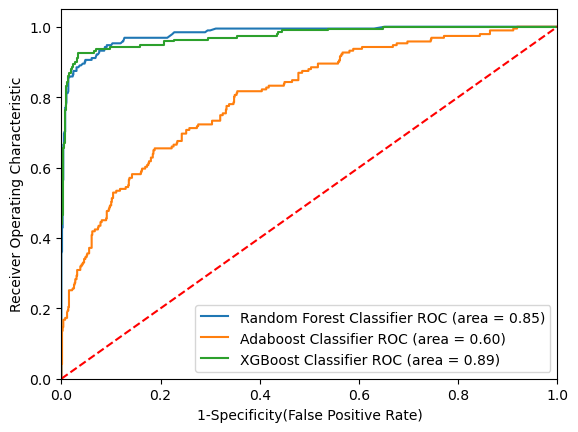

In [41]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
plt.figure()
auc_models = [
    {
        'label':'Random Forest Classifier',
        'model':RandomForestClassifier(n_estimators= 500, min_samples_split= 2, max_features= 8, max_depth= None),
        'auc':  0.8502

    },
    {
        'label':'Adaboost Classifier',
        'model':AdaBoostClassifier(n_estimators= 80,algorithm='SAMME'),
        'auc': 0.6049

    },
    {
        'label':'XGBoost Classifier',
        'model': XGBClassifier(n_estimators=300,max_depth=20,learning_rate=0.1,colsample_bytree=0.8),
        'auc': 0.8856
    }

]
for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)
    #compute false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    #calculate area under the curve to display on the plot
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)'%(algo['label'],algo['auc']))

#custom settings for the plot
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()